<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/B62_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing # Manipulasi data agar sesuai formatnya ke Regression

In [ ]:
df = pd.read_csv("/content/house.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df.shape

(4600, 18)

EDA

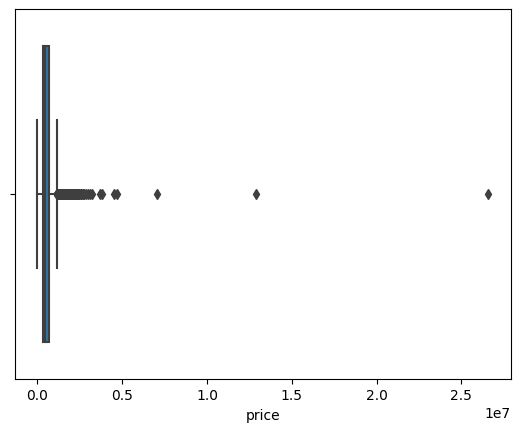

In [ ]:
# Range Harga

ax = sns.boxplot(x = df["price"])

# Kesimpulan data mengandung banyak outlier sehingga tidak representatif
# Solusi pakai quantil

<Axes: xlabel='price'>

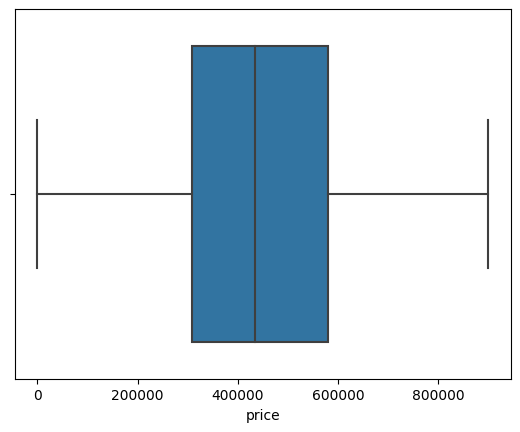

In [ ]:
q = df["price"].quantile(0.9)
data_filtered = df[df["price"] <q] #Filter data dibawah quantil 90%
sns.boxplot(x = data_filtered["price"])

In [ ]:
round(df.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


<Axes: xlabel='bedrooms', ylabel='price'>

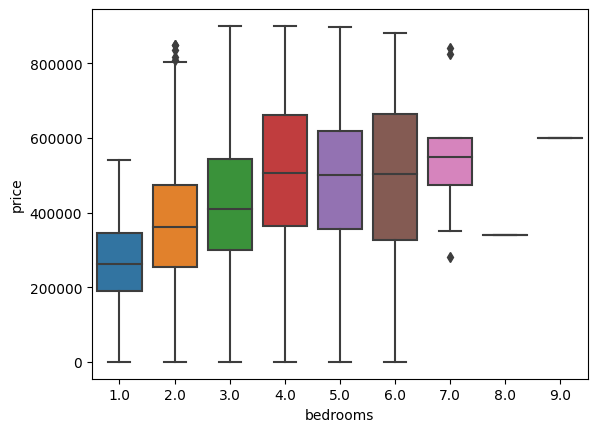

In [ ]:
sns.boxplot(x = "bedrooms",
            y = "price",
            data = data_filtered)

In [ ]:
filtered_df = df[(df['price'] >= 200000) & (df['price']<= 800000)]

In [ ]:
# Feature Engineering

selected_features = ["sqft_living",
                     "sqft_above",
                     "bathrooms",
                     "bedrooms",
                     "sqft_basement",
                     "floors",
                     "view",]

selected_data = filtered_df[selected_features]
selected_data.head()

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,1340,1340,1.50,3.0,0,1.5,0
2,1930,1930,2.00,3.0,0,1.0,0
3,2000,1000,2.25,3.0,1000,1.0,0
4,1940,1140,2.50,4.0,800,1.0,0
5,880,880,1.00,2.0,0,1.0,0


In [ ]:
selected_data["price"] = df["price"]
selected_data.head()

<ipython-input-10-0710e75e255e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["price"] = df["price"]


,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view,price
0,1340,1340,1.50,3.0,0,1.5,0,313000.0
2,1930,1930,2.00,3.0,0,1.0,0,342000.0
3,2000,1000,2.25,3.0,1000,1.0,0,420000.0
4,1940,1140,2.50,4.0,800,1.0,0,550000.0
5,880,880,1.00,2.0,0,1.0,0,490000.0


In [ ]:
x = selected_data.iloc[:, :-1] # Data Features tanpa normalization
y = selected_data["price"] # Data Target

In [ ]:
# Feature Scaling (Normalization)
X = selected_data.iloc[:, :-1].values # Ubah ke format array Pyhton
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X) #format data dalam bentuk array Pyhton bukan dataframe pandas

In [ ]:
X_scaled

array([[0.17352415, 0.20905172, 0.15      , ..., 0.        , 0.2       ,
        0.        ],
       [0.27906977, 0.3362069 , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.29159213, 0.13577586, 0.3       , ..., 0.47393365, 0.        ,
        0.        ],
       ...,
       [0.47227191, 0.56896552, 0.35      , ..., 0.        , 0.4       ,
        0.        ],
       [0.30769231, 0.15086207, 0.25      , ..., 0.48341232, 0.        ,
        0.        ],
       [0.20035778, 0.24137931, 0.35      , ..., 0.        , 0.4       ,
        0.        ]])

In [ ]:
# Ganti format array Pyhton ke pandas Dataframe

normalized_data = pd.DataFrame(X_scaled,
                               columns = selected_features)
normalized_data

,sqft_living,sqft_above,bathrooms,bedrooms,sqft_basement,floors,view
0,0.173524,0.209052,0.15,0.250,0.000000,0.2,0.0
1,0.279070,0.336207,0.25,0.250,0.000000,0.0,0.0
2,0.291592,0.135776,0.30,0.250,0.473934,0.0,0.0
3,0.280859,0.165948,0.35,0.375,0.379147,0.0,0.0
4,0.091234,0.109914,0.05,0.125,0.000000,0.0,0.0
...,...,...,...,...,...,...,...
3708,0.203936,0.245690,0.20,0.250,0.000000,0.0,0.0
3709,0.194991,0.234914,0.35,0.250,0.000000,0.4,0.0
3710,0.472272,0.568966,0.35,0.250,0.000000,0.4,0.0
3711,0.307692,0.150862,0.25,0.375,0.483412,0.0,0.0


In [ ]:
X = normalized_data.values # Dataframe ke array Pyhton

# Target
y = selected_data["price"].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2023)


In [ ]:
print("Total Data = " + str(df.shape[0])) # str untuk casting tipe data dari int (banyak baris df)
print("Total Data Training = " + str(len(x_train))) # len karena data sudah bukan dlam format pandas tapi array
print("Total Data Testing = " + str(len(x_test)))

Total Data = 4600
Total Data Training = 2970
Total Data Testing = 743


In [ ]:
# Singel Linear Regression (Features hanya satu kolom)
# Multiple Linear Regression (Features lebih dari satu kolom)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(x_test)
y_pred[:3]

array([408562.7845879 , 604693.19029039, 502375.98825918])

In [ ]:
# Decision Tree Regressor (Decision Tree)
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Support Vector Regressor (SVM)
from sklearn.svm import SVR

In [ ]:
dt_reg = DecisionTreeRegressor()
model_dt = dt_reg.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)

In [ ]:
rf_reg = RandomForestRegressor()
model_rf = rf_reg.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)

In [ ]:
svm_reg = SVR()
model_svm = svm_reg.fit(x_train, y_train)
pred_svm = model_svm.predict(x_test)

In [ ]:
result = pd.DataFrame({
    "Actual" : y_test,
    "Fred MLR" : y_pred, # Multiple Linear Regression
    "Pred DT" : pred_dt, # Decision Tree
    "Pred RF" : pred_rf, # Random Forest
    "Pred SVM" : pred_svm, # SVM
})

In [ ]:
result.head()

,Actual,Fred MLR,Pred DT,Pred RF,Pred SVM
0,522000.0,408562.784588,410000.0,400972.153333,437427.346248
1,762000.0,604693.190290,664950.0,571581.840000,437777.897244
2,780000.0,502375.988259,735000.0,492328.880000,437603.452616
3,630000.0,527749.498741,653000.0,635721.438095,437628.899667
4,460000.0,407487.737400,690000.0,491016.205556,437361.041084


# MSE

Data Actual : 1000, 2000, 1200
Data Prediksi : 1200, 1800, 1150

MSE = (1000 - 1200)** 2+(2000-1800)** 2+(1200-1150)**2 / 3

RMSE = MSE ** 0.5

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


mse_MLR = mean_squared_error(y_test, y_pred)
rmse_mlr = np.sqrt(mse_MLR)

In [ ]:
print(mse_MLR, rmse_mlr)

17346372860.74701 131705.62957120326


In [ ]:
def hitung_evaluasi(actual, pred):
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(MSE)

  return [MSE, RMSE]

In [ ]:
prediksi2 = [y_pred, pred_dt, pred_rf, pred_svm]

for pred in prediksi2:
  print(hitung_evaluasi(y_test, pred))

[17346372860.74701, 131705.62957120326]
[30530023613.171566, 174728.42817690418]
[19393834030.79671, 139261.74647331086]
[23004377457.852757, 151671.9402455601]


In [ ]:
# MAPE = Mean Absolute Percentape Erorr
from sklearn.metrics import mean_absolute_percentage_error

mape_MLR = mean_absolute_percentage_error(y_test, y_pred)
print(format(mape_MLR, 'f'))

0.276996


In [ ]:
for pred in prediksi2:
  mape_model = mean_absolute_percentage_error(y_test, pred)
  print(format(mape_model, 'f'))

0.276996
0.330798
0.280011
0.317192


# Exploratory Data Analysis menggunakan Plotly

In [ ]:
import plotly.express as px

In [ ]:
df.head

<bound method NDFrame.head of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  con

In [ ]:
q = df["price"].quantile(0.9)
data_filtered = df[df["price"] <q]
fig = px.box(data_filtered,
             x = "bathrooms",
             y = "price",
             color = "bathrooms",
             )

fig.show()

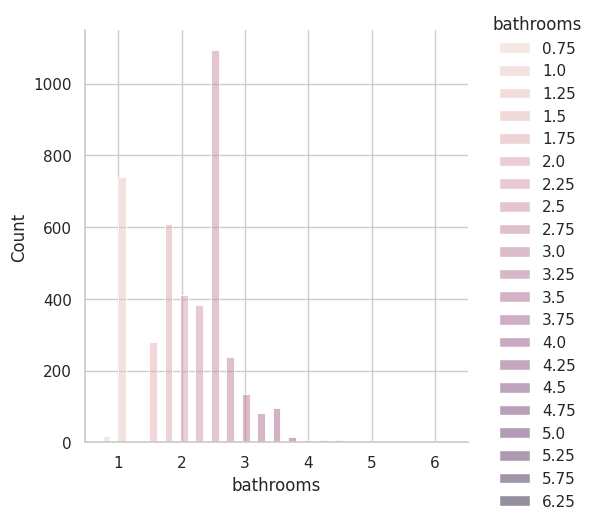

In [ ]:
sns.displot(data = data_filtered,
            x = "bathrooms",
            hue = "bathrooms",
            fill = True)